# Taller Introducción a inteligencia artificial. (Prático)

### En este taller práctico, aprenderan a crear su propio modelo para clasificar tres tipos de plantas de iris.


* Que aprenderemos hoy
  * Aprenderás a utilizar notebook y su sintaxis sencilla
  * Aprenderás las librerias para el tratamiento de la data
  * Aprenderás nociones basicas de la libreria scikitlearn para crear modelos
  * Aprenderás a separar su dataser en training - test
  * Aprenderás a entrenar su modelo con diferentes parametros.
  * Aprenderás a probar el modelo entrenado con la data de validacion.
  * Aprenderás a Visualizar su modelo final.
  * Aprenderás a utilizar las herramientas de metrica para evaluar el modelo.  

Que es un notebook en python?

Un notebook en python es una aplicación web open-source que permite crear y compartir documentos que contienen código en vivo, ecuaciones, visualización y narración de texto. Entre los usos más comunes incluye limpieza y transformacion de la data, simulación numérica, modelos estadísticos, visualización de datos, machine learning y mucho más. EL proyecto de Jupyter notebook existe para desarrollar software de código abierto, estándares abiertos y servicios para interacción computacional entre docenas de lenguajes de programación.

Okay ya se lo que es un notebook, pero y que es python?

Python es un lenguaje de programación interpretado cuya filosofía hace hincapié en la legibilidad de su código.​ Se trata de un lenguaje de programación multiparadigma, ya que soporta orientación a objetos, programación imperativa y, en menor medida, programación funcional.

Cuales son las plantas con las que vamos a trabajar hoy?

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"/>

## Importar las librerias

In [6]:
## Importar las librerias
import pandas as pd
import numpy as np
# !pip install --upgrade sklearn
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.tree import plot_tree
# Import model
from sklearn.datasets import load_iris

#Import visual libraries
%matplotlib inline

import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

## Importar Conjunto de datos

In [7]:
#import Data
data = load_iris()
X = data.data
y = data.target


In [8]:
#Show the data imported
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [14]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [67]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
df.columns=data.feature_names

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
#Lets describe using statistic our data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
#Matrix correlation
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [69]:
df = df.join(pd.DataFrame(y, columns=['target']))

In [70]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Analizar y Limpiar los datos

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

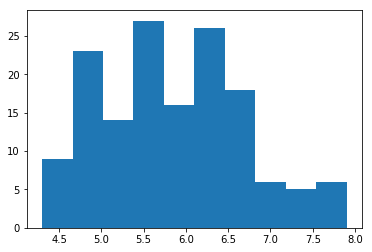

In [22]:
#Graph
plt.hist(df['sepal length (cm)'])

In [ ]:
plt.hist(df['sepal width (cm)'])

In [ ]:
plt.hist(df['petal length (cm)'])

In [ ]:
plt.hist(df['petal width (cm)'])

In [ ]:
sns.distplot(df['petal width (cm)'])

In [ ]:
#Clean

#### Standarization or normalization

* z = (x - u) / s 
* x = cada registro
* u = media
* s = desviacion

In [23]:
sepal = df['sepal length (cm)']
u = sepal.mean()
s = sepal.std()
print('mean: ', u)
print('std: ', s)

mean:  5.843333333333335
std:  0.8280661279778629


In [24]:
standarization = (sepal - u) / s
standarization.head()

0   -0.897674
1   -1.139200
2   -1.380727
3   -1.501490
4   -1.018437
Name: sepal length (cm), dtype: float64

In [ ]:
plt.hist(standarization)

In [ ]:
#Graph
plt.hist(df['sepal length (cm)'])

In [26]:
scaler = StandardScaler()

In [25]:
df_input =  df[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [27]:
scaler.fit(df_input)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
(scaler.transform(df_input))

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [30]:
df[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = (scaler.transform(df_input))# !pip install --upgrade sklearn

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


## Separar los datos en (Training, Test)

In [72]:
df = df.join(pd.DataFrame(y, columns=['output']))

In [34]:
#Split training / Test in 80% / 20%
training = df[:120]

In [35]:
training.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,output
0,-0.900681,1.019004,-1.340227,-1.315444,0,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0,0
2,-1.385353,0.328414,-1.397064,-1.315444,0,0
3,-1.506521,0.098217,-1.283389,-1.315444,0,0
4,-1.021849,1.249201,-1.340227,-1.315444,0,0


In [36]:
test = df[120:150]

In [37]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,output
120,1.280340,0.328414,1.103783,1.448832,2,2
121,-0.294842,-0.592373,0.649083,1.053935,2,2
122,2.249683,-0.592373,1.672157,1.053935,2,2
123,0.553333,-0.822570,0.649083,0.790671,2,2
124,1.038005,0.558611,1.103783,1.185567,2,2


In [73]:
df_input = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
df_output = df[['output']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.20, random_state=42)

In [40]:
print("Training input size: ", X_train.shape, "\nTraining output size: ", y_train.shape, "\nTest input size: ", X_test.shape, "\nTest output size: ", y_test.shape)

Training input size:  (120, 4) 
Training output size:  (120, 1) 
Test input size:  (30, 4) 
Test output size:  (30, 1)


In [75]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


## Lets build our first model (Vamos a crear nuestro primer modelo!!)

In [87]:
## Create an instance of the desicion tree model
model = DecisionTreeClassifier(random_state=42)

In [88]:
## Parameters we should considered in our model
model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')>

In [89]:
## Lets train our model, how people call you when you are going to the gym and you are in shape! Clue: That you are a (fit) person
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [90]:
# !pip install --upgrade sklearn
# !pip install scikit-learn
# from sklearn.tree import plot_tree

In [91]:
## Lets evaluate our model with the test data
evaluation = model.predict(X_test)
evaluation

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [92]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
## Lets create a confusion matrix with the predicted data and the real data
confusion_matrix(y_test, evaluation)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [93]:
print(classification_report(y_test, evaluation))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [94]:
accuracy_score(y_test, evaluation)

1.0

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.1)


In [98]:
sklearn.__version__

'0.20.3'

In [ ]:
## Metrics to evaluate our predictions. Clue: We used 4 in the introduction to Artificial Intelligence

In [ ]:
## Lets check if our model is overfitting or underfitting

## Separemos los datos ahora en tres (Training, Test y Validation)

In [ ]:
#Split training / Test / Validation in (##)% (##)% (##%)

In [ ]:
#Show our datasets

In [ ]:
#print our dataset

## Lets build our second model (Vamos a crear nuestro segundo modelo!!)

In [ ]:
## Create an instance of the desicion tree model

In [ ]:
## Lets train our model, how people call you when you are going to the gym and you are in shape! Clue: That you are a ___ person

In [ ]:
## Lets evaluate our model with the test data

In [ ]:
## Lets create a confusion matrix with the predicted data and the real data

In [ ]:
## Metrics to evaluate our predictions. Clue: We used 4 in the introduction to Artificial Intelligence

In [ ]:
## Lets check if our model is overfitting or underfitting

## Separemos los datos ahora en (Training, Test) usando cross validation

In [ ]:
#Split training / Test / Validation in (##)% (##)% (##%)

In [ ]:
## Create an instance of the desicion tree model

In [ ]:
## Lets train our model, using cross validation

In [ ]:
## Lets evaluate our model with the test data

In [ ]:
## Lets create a confusion matrix with the predicted data and the real data

In [ ]:
## Metrics to evaluate our predictions. Clue: We used 4 in the introduction to Artificial Intelligence

In [ ]:
## Lets check if our model is overfitting or underfitting